In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="5" color="red">ch07. 객체지향 프로그래밍 </font></b>
프로그래밍 언어는 객체지향 언어와 함수지향 언어가 있다

- 개념 익히기

In [7]:
person1 = {'name':'kil dong', 'gender':'male','accademy':'MBC'}
person2 = {'name':'kil suk', 'sender':'female', 'accademy':'MBC'}
print(person1['name'], person1['gender'], person1['accademy'])
person2['name'] = 'kkil suk'
print(person2['name'], person2.get('gender'), person2['accademy'])

kil dong male MBC
kkil suk None MBC


In [24]:
# person 타입의 클래스를 만들겠다.
# 클래스 이름은 대문자로 시작. 카멜형으로 작성
# 클래스 안의 함수는 인스턴스 함수라고 부르며, 매개변수는 일반적으로 self를 쓴다. self = '내 객체의'
class Person:                   
    # (Object)는 주로 생략된다. __str__() 함수 는 Object 안에 있는데, 클래스를 만들때 Person 클래스로 상속시킨다
    accademy = 'MBC'                    # 클래스 변수 : 클래스 안에서 기본값을 갖는 변수. 여기서는 accademy 
    def __init__(self, name, gender):   # __init__ : 생성자함수, 객체가 생성될 때 자동으로 실행되는 함수
        self.name = name                # 객체 안의 변수(인스턴스 변수)
        self.gender = gender
        
    def print_info(self):
        print('{}는 {}입니다. {}를 다닙니다'.format(self.name, 
                                               self.gender, 
                                               self.accademy))
    def __str__(self):
        return '{}는 {}입니다. {}를 다닙니다'.format(self.name, 
                                               self.gender, 
                                               self.accademy)

In [26]:
p1 = Person('홍길동', '남자')
p2 = Person('홍길술', '여자')
p1.print_info()
p2.print_info()
p1.name = '김탁구'
p1.accademy = '제빵소'
p1.print_info()
p2.print_info()


홍길동는 남자입니다. MBC를 다닙니다
홍길술는 여자입니다. MBC를 다닙니다
김탁구는 남자입니다. 제빵소를 다닙니다
홍길술는 여자입니다. MBC를 다닙니다


In [27]:
print(p1)
print(p1.__str__())   # 클래스를 만들때

김탁구는 남자입니다. 제빵소를 다닙니다
김탁구는 남자입니다. 제빵소를 다닙니다


# 1절. 객체와 클래스
```
class 클래스명(상속받을 클래스명):
    변수나 함수들 선언
```

In [29]:
class Person:
    '''
    Person 클래스는 블라블라 설명하는 독스트링 삽입 가능
    생성자 함수가 없을 경우, 디폴트 생성자 함수가 자동 생성
    '''
    def __init__(self): # 생성자 함수를 쓰지 않을 수 있다. 
        pass          # 이 경우 '아무것도 하지 않는 생성자 함수'(디폴트 생성자 함수)가 자동 생성

p1=Person()
print(p1)
print(type(p1))

<class '__main__.Person'>


In [30]:
isinstance(p1, Person)

True

In [31]:
p1.__doc__

'\n    Person 클래스는 블라블라 설명하는 독스트링 삽입 가능\n    생성자 함수가 없을 경우, \n    '

# 2절. 생성자와 소멸자
```
- 생성자는 __init__(self, 매개변수,...) - 객체가 생성될때 자동 실행. 
    객체 생성시 필요한 객체 안에 있는 변수(인스턴스 변수)를 초기화 및 설정을 포함
- 소멸자는 __del__(self) - 객체가 소멸될 때 자동 실행
    인스턴스 객체의 레퍼런스 카운트가 0이 될 때 실행
```

In [32]:
class Person:
    accademy = "MBC"
    def __init__(self, name, gender='남자'):
        self.name = name        # 인스턴스 변수
        self.gender = gender
        print('Person 객체를 생성합니다', name)

# 함수 오버로딩(중복)될 지원안됨, 마지막 생성자만 유효함        
#     def __init__(self, name):
#         self.name = name        
#         self.gender = '남자'
        
    def __del__(self):
        print('Person 객체를 소멸시킵니다', self.name)
        
    def print_info(self):
        print('{}는 {}입니다'.format(self.name,
                                    self.gender))
    def __str__(self):   # 오버라이딩(함수 재정의) : 이미 Object에게 상속받은 __str__함수를 변경하는 중
        return f'{self.name}는 {self.gender}입니다.'
    
    
    

In [34]:
p1 = Person('신사임당', '여자')
p2 = Person('홍길동')
print(p1, p2)

Person 객체를 생성합니다 신사임당
Person 객체를 소멸시킵니다 신사임당
Person 객체를 생성합니다 홍길동
Person 객체를 소멸시킵니다 홍길동
신사임당는 여자입니다. 홍길동는 남자입니다.


In [35]:
p3 = p2

In [36]:
del p1

Person 객체를 소멸시킵니다 신사임당


In [37]:
del p2

In [38]:
del p3

Person 객체를 소멸시킵니다 홍길동


# 3절. 변수와 메소드(함수)
- 인스턴스 변수 vs 클래스 변수
- 인스턴스 메소드(self) vs 클래스 메소드(clz) vs static 메소드()

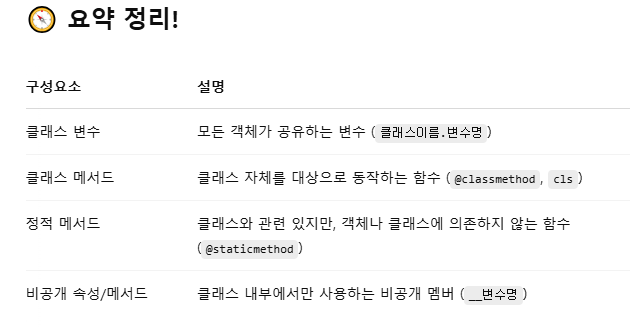

In [40]:
class Person:
    name = '홍길동' # 클래스 변수
    gender = '남자'
print(Person.name, Person.gender)

홍길동 남자


In [41]:
p1 = Person()

In [43]:
p2 = Person()

In [44]:
print(Person.name, Person.gender)   # 클래스의 데이터를 p1과 p2가 참조하며 양쪽에 클래스 데이터가 부여됨
print(p1.name, p1.gender)
print(p2.name, p2.gender)

홍길동 남자
홍길동 남자
홍길동 남자


In [46]:
p2.name = '이순신'                   # p2 객체의 name 변수를 변경. 해당 객체에만 변경 적용됨 
print(Person.name, Person.gender)   
print(p1.name, p1.gender)
print(p2.name, p2.gender)

홍길동 남자
홍길동 남자
이순신 남자


In [47]:
Person.name = '리사'                # Person 클래스의 클래스 변수인 name, gender를 변경
Person.gender = '여자'              # Person 클래스를 통한 객체들의 속성들이 같이 변경됨
print(Person.name, Person.gender)   
print(p1.name, p1.gender)
print(p2.name, p2.gender)          # 단, 사전에 객체에 적용한 변경은 유지됨

리사 여자
리사 여자
이순신 여자


### 메소드 비교
**※인스턴스 메소드(self) vs 클래스 메소드(clz) vs static 메소드()**
- 인스턴스 메소드(self) : 첫번째 인자에 self를 꼭 명시. 객체를 통해서만 호출할 수 있는 메소드
- 클래스 메소드(clz) : 메소드 위에 @classmethod를 선언한 메소드. 첫번째 인자에 cls(clz) 꼭 명시
- static 메소드() : 메소드 위에 @staticmethod를 선언한 메소드. 인자를 넣지 않음

In [50]:
class Person:
    name = '홍길동' # 클래스 변수
    gender = '남자'

    def print_info(self):   # 객체변수명.print_info()로 호출
        print('인스턴스(일반)메소드 - {}는 {}입니다'.format(self.name, self.gender))
    
    def change_info(self, name, gender='남자'):  # 객체변수명.change_info('김', '여자')
        self.name = name
        self.gender = gender
        print('인스턴스(일반)메소드 - {}/{}로 변경합니다.'.format(self.name, self.gender))
        
    @classmethod
    def do_(clz):  # clz==Person  클래스 변수를 이용한 로직이 있을때 주로 사용. Person.do_() / 객체명.do_()
        clz.name = '신사임당'
        clz.gender = '여자'
        print('클래스 메소드 - {}/{}로 변경합니다.'.format(clz.name, clz.gender))
        
    @staticmethod   # 클래스 변수를 이용하기보다는 로직이 우선일 경우. Person.that_() / 객체명.that_()
    def that_():  
        Person.name = '신길동'
        Person.gender = '남자'
        print('static 메소드 - {}/{}로 변경합니다.'.format(Person.name, Person.gender))


In [51]:
p1 = Person()
p1.print_info()

인스턴스(일반)메소드 - 홍길동는 남자입니다


In [52]:
Person.do_()

클래스 메소드 - 신사임당/여자로 변경합니다.


In [55]:
p1.print_info()

인스턴스(일반)메소드 - 신사임당는 여자입니다


In [56]:
Person.that_()

static 메소드 - 신길동/남자로 변경합니다.


In [57]:
p1.print_info()

인스턴스(일반)메소드 - 신길동는 남자입니다


# 4절. 사